In [1]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
sys.path.append('training/')
sys.path.append('./')
from config_training import config 
sys.path.append('preprocessing/')
from step1 import *
from full_prep import lumTrans
from layers import nms,iou

/home/anaconda/lib/python2.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
img = np.load('/datasets/preprocess/stage1/ffe02fe7d2223743f7fb455dfaff3842_clean.npy')
pbb = np.load('/datasets/results/detector_results/res18_mylabel/bbox/ffe02fe7d2223743f7fb455dfaff3842_pbb.npy')

In [3]:
pbb = pbb[pbb[:,0]>-1]

In [4]:
pbb = nms(pbb,0.05)
box = pbb[0].astype('int')[1:]

In [5]:
box

array([ 49, 149,  21,   8])

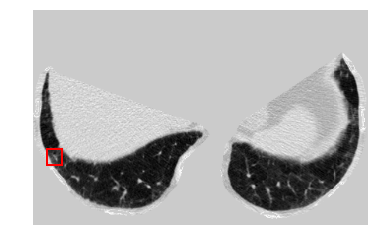

In [6]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray')
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)
